# Tarea 4. Midiendo rendimiento y riesgo en un portafolio.

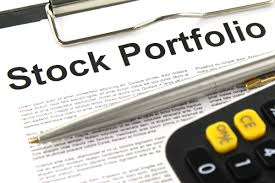

**Resumen.**
> En esta tarea, calcularás medidas de rendimiento esperado diario y volatilidad para cuatro diferentes portafolios. Usarás los históricos de precios que ya descargaste en la tarea anterior.

**Criterio de revisión.**
> Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.

**Antes de comenzar.**
> Por favor, copiar y pegar este archivo en otra ubicación. Antes de comenzar, nombrarlo *Tarea4_ApellidoNombre*, sin acentos y sin espacios; por ejemplo, en mi caso el archivo se llamaría *Tarea4_JimenezEsteban*. Resolver todos los puntos en dicho archivo y subir en este espacio.

## 1. Descarga de datos (10 puntos)

Descargar los precios diarios ajustados en el cierre para el índice S&P 500 (^GSPC), Microsoft (MSFT), Walgreens (WBA), y Tesla Motors (TSLA) durante el periodo comprendido del primero de enero del 2015 hasta el 31 de diciembre del 2019.


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_datareader.data as web
from scipy.optimize import minimize

1. Mostrar el DataFrame de los precios diarios (2 puntos).

In [20]:
def get_adj_closes(tickers, start_date=None, end_date=None):
    closes = web.DataReader(name=tickers, data_source='yahoo', start='2015-01-01', end='2019-12-31')
    closes = closes['Adj Close']
    closes.sort_index(inplace=True)
    return closes

In [21]:
company = ['^GSPC', 'MSFT', 'WBA', 'TSLA']

In [22]:
closes = get_adj_closes(tickers=company,start_date= '2015-01-01')
closes

Symbols,^GSPC,MSFT,WBA,TSLA
Date,,,,
2015-01-02,2058.199951,41.864841,67.541489,219.309998
2015-01-05,2020.579956,41.479866,66.208420,210.089996
2015-01-06,2002.609985,40.871037,66.377274,211.279999
2015-01-07,2025.900024,41.390320,68.074707,210.949997
2015-01-08,2062.139893,42.607944,68.918983,210.619995
...,...,...,...,...
2019-12-24,3223.379883,156.951309,57.844334,425.250000
2019-12-26,3239.909912,158.237793,58.389572,430.940002
2019-12-27,3240.020020,158.527008,58.508530,430.380005


2. Graficar los precios (3 puntos).

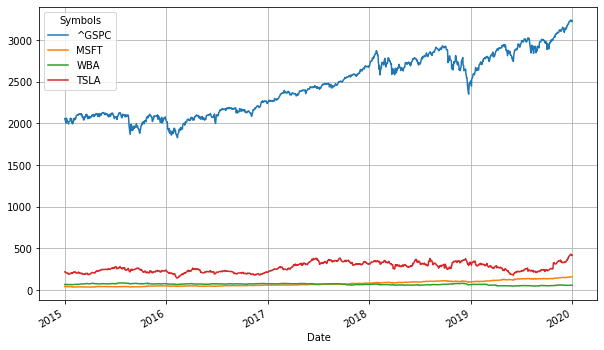

In [23]:
closes.plot(figsize=(10,6),grid=True)

3. Mostrar el DataFrame de los rendimientos porcentuales diarios (2 puntos).

In [71]:
rend=closes.pct_change().dropna()
rend

Symbols,^GSPC,MSFT,WBA,TSLA
Date,,,,
2015-01-05,-0.018278,-0.009196,-0.019737,-0.042041
2015-01-06,-0.008893,-0.014678,0.002550,0.005664
2015-01-07,0.011630,0.012705,0.025573,-0.001562
2015-01-08,0.017888,0.029418,0.012402,-0.001564
2015-01-09,-0.008404,-0.008405,-0.024243,-0.018802
...,...,...,...,...
2019-12-24,-0.000195,-0.000191,-0.003756,0.014384
2019-12-26,0.005128,0.008197,0.009426,0.013380
2019-12-27,0.000034,0.001828,0.002037,-0.001299


4. Graficar los rendimientos (3 puntos).

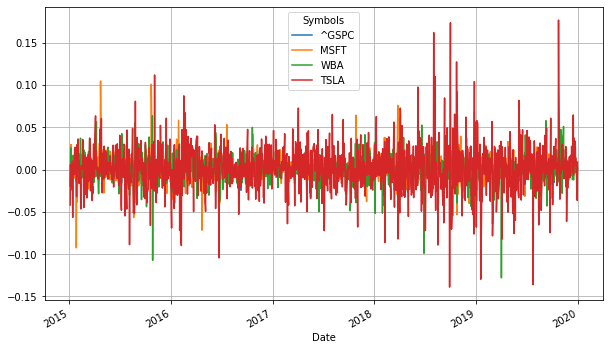

In [72]:
rend.plot(figsize=(10,6),grid=True)

## 2. Rendimiento esperado y volatilidad para cada activo (20 puntos)

Usando los datos de rendimientos diarios de MSFT, WBA, y TSLA

1. Reportar en un DataFrame el rendimiento esperado diario y la volatilidad diaria para cada activo. Reportar en otro DataFrame el rendimiento esperado anual y la volatilidad anual para cada activo (10 puntos).

In [73]:
rmd=pd.DataFrame(data={'Rendimiento Medio Diario':rend.mean()},index=rend.columns)
rmd

,Rendimiento Medio Diario
Symbols,
^GSPC,0.000395
MSFT,0.001161
WBA,0.000006
TSLA,0.000913


In [74]:
voldia= pd.DataFrame(data={'Volatilidad Diaria':rend.std()},index=rend.columns)
voldia

,Volatilidad Diaria
Symbols,
^GSPC,0.008466
MSFT,0.014686
WBA,0.015506
TSLA,0.028312


In [75]:
rsa= pd.DataFrame(data={'Mean':252*rend.mean(),'Volatilidad':np.sqrt(252)*rend.std()},index=rend.columns)
rsa

,Mean,Volatilidad
Symbols,,
^GSPC,0.099454,0.134390
MSFT,0.292548,0.233130
WBA,0.001609,0.246148
TSLA,0.230067,0.449436


2. Calcular la matriz de varianza-covarianza (base diaria) para los activos MSFT, WBA, y TSLA (5 puntos).

In [76]:
cov= rend.cov()
cov

Symbols,^GSPC,MSFT,WBA,TSLA
Symbols,,,,
^GSPC,0.000072,0.000094,0.000069,0.000091
MSFT,0.000094,0.000216,0.000084,0.000129
WBA,0.000069,0.000084,0.000240,0.000100
TSLA,0.000091,0.000129,0.000100,0.000802


3. Calcular la matriz de correlación (base diaria) para los activos MSFT, WBA, y TSLA (5 puntos).\
Para este punto, investigar los métodos `cov` y `corr` de los objetos tipo `pd.DataFrame`.

In [77]:
corr= rend.corr(method ='pearson')
corr

Symbols,^GSPC,MSFT,WBA,TSLA
Symbols,,,,
^GSPC,1.000000,0.759790,0.525025,0.379696
MSFT,0.759790,1.000000,0.369590,0.311284
WBA,0.525025,0.369590,1.000000,0.228469
TSLA,0.379696,0.311284,0.228469,1.000000


## 3. Rentimiento esperado y volatilidad para portafolios (45 puntos)

1. Calcular los rendimientos diarios de los siguientes portafolios. Reportar en un DataFrame el rendimiento esperado anual y la volatilidad anual para cada portafolio, calculando lo anterior tratando cada portafolio como si fuera un activo individual (20 puntos).
 - Portafolio 1: igualmente ponderado entre MSFT, WBA, y TSLA.
 - Portafolio 2: 30% MSFT, 20% WBA, y 50% TSLA.
 - Portafolio 3: 50% MSFT, 30% WBA, y 20% TSLA.
 - Portafolio 4: 20% MSFT, 50% WBA, y 30% TSLA.

In [78]:

rend['P1']=(1/3)*rend["MSFT"]+(1/3)*rend['WBA']+(1/3)*rend['TSLA']
rend['P2']=(.30)*rend["MSFT"]+(.20)*rend['WBA']+(.50)*rend['TSLA']
rend['P3']=(.50)*rend["MSFT"]+(.30)*rend['WBA']+(.20)*rend['TSLA']
rend['P4']=(.20)*rend["MSFT"]+(.50)*rend['WBA']+(.30)*rend['TSLA']
rend.mean()

Symbols
^GSPC    0.000395
MSFT     0.001161
WBA      0.000006
TSLA     0.000913
P1       0.000693
P2       0.000806
P3       0.000765
P4       0.000509
dtype: float64

In [79]:
#Rendimiento esperado diario
ErP1=rend['P1'].mean()
ErP2=rend['P2'].mean()
ErP3=rend['P3'].mean()
ErP4=rend['P4'].mean()
ErP1, ErP2, ErP3, ErP4


(0.0006934175479603959,
 0.0008060300434314382,
 0.000764960370348855,
 0.0005092622301008943)

In [80]:
st1=rend['P1'].std()
st2=rend['P2'].std()
st3=rend['P3'].std()
st4=rend['P4'].std()
st1, st2, st3, st4

(0.01447386962502001,
 0.017274388952763592,
 0.013068630409660068,
 0.014259315746508263)

In [89]:
res1= pd.DataFrame(data={'Mean':[ErP1,ErP2,ErP3,ErP4],'Volatilidad':[st1,st2,st3,st4]},index=['P1','P2','P3','P4'])
res1.Mean = res1.Mean*252
res1.Volatilidad = res1.Volatilidad*252**(1/2)
res1

,Mean,Volatilidad
P1,0.174741,0.229766
P2,0.203120,0.274222
P3,0.192770,0.207458
P4,0.128334,0.226360


2. Para cada uno de los anteriores portafolios, reportar en otro DataFrame el rendimiento esperado anual y la volatilidad anual para cada portafolio, calculando lo anterior mediante las fórmulas de rendimiento esperado y volatilidad para portafolios derivadas en clase (20 puntos).

In [90]:
portf=pd.DataFrame([[0,1/3,1/3,1/3],[0,0.3,0.2,0.5],[0,0.5,0.3,0.2],[0,0.2,0.5,0.3]],
                         columns=['^GSPC','MSFT','WBA','TSLA'],index=['P1','P2','P3','P4'])
portf

,^GSPC,MSFT,WBA,TSLA
P1,0,0.333333,0.333333,0.333333
P2,0,0.300000,0.200000,0.500000
P3,0,0.500000,0.300000,0.200000
P4,0,0.200000,0.500000,0.300000


In [91]:
rendim=rsa['Mean'].dot(portf.T)
rendim

P1    0.174741
P2    0.203120
P3    0.192770
P4    0.128334
Name: Mean, dtype: float64

In [92]:
volat=np.zeros((len(portf.iloc[:,0]),))
for i in range(len(portf.iloc[:,0]),):
    volat[i]=(portf.iloc[i,:].dot(portf.iloc[i,:].dot(cov)))**(1/2)
volat=pd.Series(volat,index=['P1','P2','P3','P4'])
volat

P1    0.014474
P2    0.017274
P3    0.013069
P4    0.014259
dtype: float64

In [93]:
rsms=pd.DataFrame(data={'Mean':rendim*252,'Volatilidad':np.sqrt(252)*volat},
                        index=['P1','P2','P3','P4']) 
rsms

,Mean,Volatilidad
P1,44.034788,0.229766
P2,51.186132,0.274222
P3,48.578043,0.207458
P4,32.340189,0.226360


3. Comparar los resultados del punto uno con los del punto dos (5 puntos).

> En comparación del punto uno y dos los resultados son iguales, ya que de las dos maneras se pueden obtener el rendimiento esperado y la volatilidad. 

## 4. Gráfico de rendimientos esperados vs. volatilidad (25 puntos)

1. Crear un gráfico de puntos que muestre el rendimiento esperado y la volatilidad para cada uno de los activos, el índice S&P500, y los cuatro portafolios en el espacio rendimiento esperado (eje y) contra volatilidad (eje x). Etiquetar cada uno de los puntos y los ejes apropiadamente (15 puntos).

Text(0.44943618505917177, 0.2300668027653254, 'GSPC')

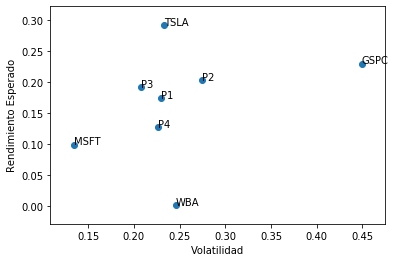

In [96]:
X = pd.concat([res1['Volatilidad'],rsa['Volatilidad']])
Y = pd.concat([res1['Mean'],rsa['Mean']])

plt.scatter(X,Y)
plt.xlabel('Volatilidad')
plt.ylabel('Rendimiento Esperado')

plt.text(X[0],Y[0], 'P1')
plt.text(X[1],Y[1], 'P2')
plt.text(X[2],Y[2], 'P3')
plt.text(X[3],Y[3], 'P4')

plt.text(X[4],Y[4], 'MSFT')
plt.text(X[5],Y[5], 'TSLA')
plt.text(X[6],Y[6], 'WBA')
plt.text(X[7],Y[7], 'GSPC')

2. ¿Qué puede concluir acerca de la posición en el gráfico de los portafolios respecto a los activos? (10 puntos)

> Como podemos ver, los rendimientos del portafolio 2 son los mas altos y es justamente este portafolio el que contiene mayor porcentaje de la acción de Tesla, y es ésta la que tiene mayores rendimientos. Y el portafolio con menores rendimientos es el que tiene mayor porcentaje del activo con menor rendimiento.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>